In [6]:
import torch
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from models import Generator

In [7]:
model = Generator()
states = torch.load('ckpt_latest.pth')
model.load_state_dict(states['generator'])

<All keys matched successfully>

In [8]:
test_image = "D:\\Datasets\\AHE\\test\\stained_glass\\4.jpg"

In [9]:
test = cv2.imread(test_image).astype(np.float32) / 255.0

In [11]:
bw = cv2.imread(test_image,0).astype(np.float32)/255.0

In [12]:
new_img = np.array([bw, bw, bw])

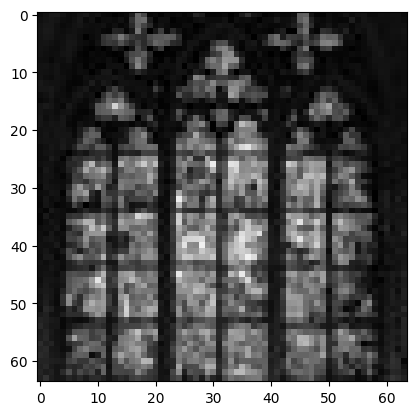

In [13]:
plt.imshow(np.transpose(new_img,(1,2,0)))

In [14]:
to_tensor = torch.tensor(new_img)[None, :, : ]
model.eval()
with torch.inference_mode():
    colourised = model(to_tensor).squeeze().permute(1,2,0).numpy()

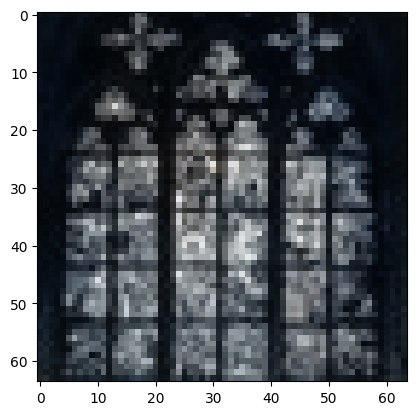

In [15]:
plt.imshow(colourised)

In [16]:
cv2.imwrite('colourised.png',colourised * 255)

True